In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import time
from algo import *
from util import *
from environment import *
from ids import *

In [2]:
def set_experiment6(price_list=np.linspace(0.01,1,100), segments=1000, update_freq=10, T=2000):
    start = time.time()
    exp_MAB_1 = pricing_MAB(price_list=price_list, segments=segments,update_freq=update_freq, exp='exp6', T=T)
    exp_MAB_1.segments_means(param1=3,param2=6)
    df1, df2 = exp_MAB_1.true_optimal()
    print('time:',time.time()-start)
    return exp_MAB_1, df1, df2

The true optimal arm in first 1000 rounds is: 13
The true optimal arm in the rest is: 31
time: 66.43714928627014


<AxesSubplot:ylabel='Density'>

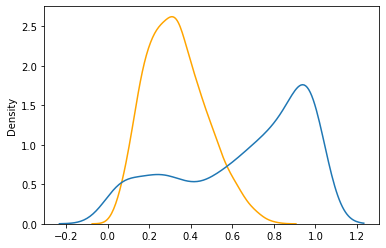

In [3]:
#changeable parameters
np.random.seed(7777)
price_list=np.linspace(0.01,1,50)
T = 2000

#fix parameters
segments = 1000
update_freq = 10
trial_rounds = 5
exp_MAB_1, df1, df2 = set_experiment6(price_list=price_list, segments=segments, update_freq =10, T=T)
sns.kdeplot(exp_MAB_1.seg_means, color='orange')
sns.kdeplot(exp_MAB_1.seg_means_2)

In [4]:
#IDS_1
IDS_1_df = pd.DataFrame()
IDS_1_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    IDS_1 = IDS_pull(price_list=price_list, N=update_freq+1, start_L=2, update_L=2,
                     simulate_time_initiate=1, simulate_time_update=1, window_width=100)
    IDS_1_sum, IDS_1_pt, IDS_1_re, IDS_1_arm, IDS_1_post = IDS_1.IDS(T=T, pricing_MAB=exp_MAB_1, mode='mode1',
                                                                     update_style='none', base=1000, p=np.nan,
                                                                     p_y=np.nan, R=np.nan)
    end = time.time()
    print('trial',i, 'IDS_1 time:',end-start)
    exp_MAB_1.reset_t()
    IDS_1_df = IDS_1_df.append([np.cumsum(IDS_1_re)])
    IDS_1_df_arm = IDS_1_df_arm.append([IDS_1_arm])

trial 0 IDS_1 time: 26.266485929489136
Reward change detected at time: 297
Detected Sign: -1
eg triggered at  298
arm
4.0     1.000000
12.0    1.000000
14.0    0.808725
20.0    0.755881
28.0    0.174298
36.0    1.000000
44.0    1.000000
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.010000000000000002
arm
12.0    0.067003
14.0    0.344716
15.0    0.749276
44.0    1.000000
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.001
eg triggered at  491
arm
4.0     1.000000
11.0    0.612439
12.0    1.000000
14.0    0.063296
20.0    1.000000
28.0    0.023526
36.0    1.000000
44.0    1.000000
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.0001
Reward change detected at time: 1005
Detected Sign: 1
eg triggered at  1031
arm
4.0     0.005484
12.0    1.000000
15.0    1.000000
16.0    0.699082
17.0    1.000000
18.0    0.515303
20.0    0.536579
28.0    0.039233
36.0    0.012134
44.0    0.005491
Name: pvalue, dtype: float64
tested 

In [5]:
#IDST_1
IDST_1_df = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    IDST_1 = IDS_theta_pull(price_list=price_list, N=update_freq+1, start_L=2, update_L=2,
                     simulate_time_initiate=1, simulate_time_update=1, window_width=100)
    IDST_1_sum, IDST_1_pt, IDST_1_re, IDST_1_arm, IDST_1_post = IDST_1.IDS(T=T, pricing_MAB=exp_MAB_1, mode='mode1',
                                                                     update_style='none', base=1000, p=np.nan,
                                                                     p_y=np.nan, R=np.nan)
    end = time.time()
    print('trial',i, 'IDST_1 time:',end-start)
    exp_MAB_1.reset_t()
    IDST_1_df = IDST_1_df.append([np.cumsum(IDST_1_re)])

Reward change detected at time: 541
Detected Sign: -1
eg triggered at  541
arm
4.0     1.000000
12.0    1.000000
20.0    0.503582
28.0    1.000000
36.0    0.477227
44.0    1.000000
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.010000000000000002
arm
17.0    0.760207
18.0    0.220117
20.0    0.586435
44.0    1.000000
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.001
eg triggered at  570
arm
4.0     0.206760
12.0    0.540607
16.0    1.000000
17.0    0.440392
18.0    0.750433
20.0    0.750091
28.0    0.508171
36.0    1.000000
44.0    1.000000
Name: pvalue, dtype: float64
tested non-significant , eg_p decayed to 0.0001
Reward change detected at time: 1003
Detected Sign: -1
Detector cooling
eg triggered at  1016
arm
4.0     1.000000
12.0    0.042279
16.0    1.000000
17.0    0.701090
18.0    1.000000
20.0    1.000000
24.0    0.364542
28.0    0.350895
36.0    0.631788
44.0    0.060234
Name: pvalue, dtype: float64
tested non-significant , eg_

In [17]:
# UCB1 
UCB_df = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    UCB1 = UCBPI_pull(price_list=price_list, segments=segments, c=2, bias=0, UCB1=True, tuned=True)
    UCB1_sum, UCB1_pt, UCB1_re, UCB1_arm = UCB1.UCBPI(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'UCB time:',end-start)
    exp_MAB_1.reset_t()
    UCB_df = UCB_df.append([np.cumsum(UCB1_re)])
    
# UCBPI family
UCBPI_df = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    UCBPI = UCBPI_pull(price_list=price_list, segments=segments, c=4, bias=0, UCB1=False, tuned=False)
    UCBPI_sum, UCBPI_pt, UCBPI_re, UCBPI_arm = UCBPI.UCBPI(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'UCBPI time:',end-start)
    exp_MAB_1.reset_t()
    UCBPI_df = UCBPI_df.append([np.cumsum(UCBPI_re)])
    
# TS
TS_df = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    TS = TS_pull(price_list=price_list, est='MEAN')
    TS_sum, TS_pt, TS_re, TS_arm = TS.TS(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'TS time:',end-start)
    exp_MAB_1.reset_t()
    TS_df = TS_df.append([np.cumsum(TS_re)])

# EG
EG_df = pd.DataFrame()
EG_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    EG = EG_pull(price_list=price_list)
    EG_sum, EG_pt, EG_re, EG_arm = EG.EG(T=T, pricing_MAB=exp_MAB_1, e=0.1)
    end = time.time()
    print('trial',i, 'EG time:',end-start)
    exp_MAB_1.reset_t()
    EG_df = EG_df.append([np.cumsum(EG_re)])

trial 0 UCB time: 2.592452049255371
trial 1 UCB time: 2.6324288845062256
trial 2 UCB time: 2.8446202278137207
trial 3 UCB time: 2.6474480628967285
trial 4 UCB time: 2.6753039360046387
trial 0 UCBPI time: 1.3843719959259033
trial 1 UCBPI time: 1.3817532062530518
trial 2 UCBPI time: 1.3669099807739258
trial 3 UCBPI time: 1.3774819374084473
trial 4 UCBPI time: 1.4150769710540771
trial 0 TS time: 1.463474988937378
trial 1 TS time: 1.458678960800171
trial 2 TS time: 1.4429030418395996
trial 3 TS time: 1.649022102355957
trial 4 TS time: 1.4437458515167236
trial 0 EG time: 0.13498806953430176
trial 1 EG time: 0.1380932331085205
trial 2 EG time: 0.13703203201293945
trial 3 EG time: 0.1354198455810547
trial 4 EG time: 0.13642191886901855


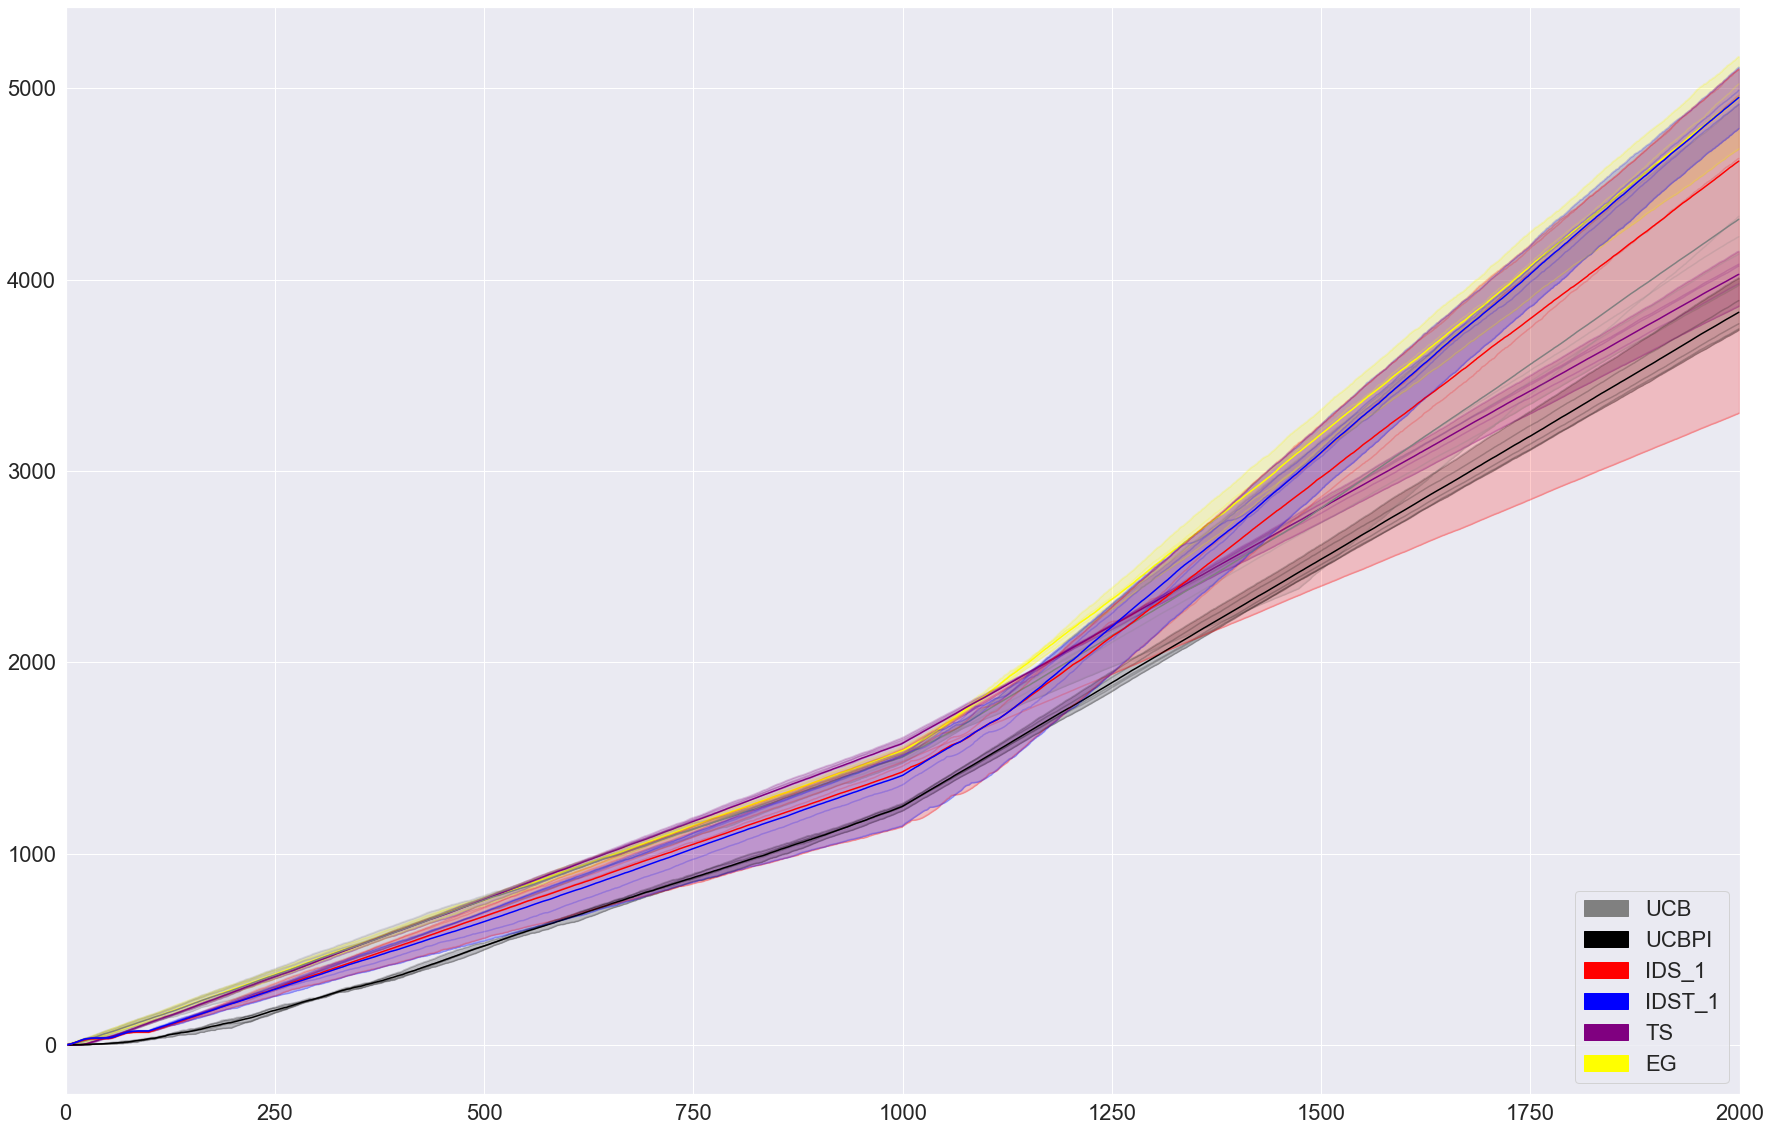

In [25]:
import matplotlib.patches as mpatches
def draw_exp_graph(IDS_1,IDST_1,UCB,UCBPI,TS, EG):
    IDS_1_mean = IDS_1.mean()
    IDST_1_mean = IDST_1.mean()
    UCB_mean = UCB.mean()
    UCBPI_mean = UCBPI.mean()
    TS_mean = TS.mean()
    EG_mean = EG.mean()
    
    plt.figure(figsize=(30,20))
    sns.set(font_scale=2)
    
    T = EG.shape[1]
    
    for i in range(EG.shape[0]):
        plt.plot(EG.iloc[i],alpha=0.2,color='yellow')
    plt.plot(EG_mean,alpha=1,color='yellow')
    plt.fill_between(np.arange(T), EG.min(), EG.max(), color='yellow', alpha=0.2)
    
    for i in range(TS.shape[0]):
        plt.plot(TS.iloc[i],alpha=0.2,color='purple')
    plt.plot(TS_mean,alpha=1,color='purple')
    plt.fill_between(np.arange(T), TS.min(), TS.max(), color='purple', alpha=0.2)
    
    for i in range(UCB.shape[0]):
        plt.plot(UCB.iloc[i],alpha=0.2,color='gray')
    plt.plot(UCB_mean,alpha=1,color='gray')
    plt.fill_between(np.arange(T), UCB.min(), UCB.max(), color='gray', alpha=0.2)
    
    for i in range(UCBPI.shape[0]):
        plt.plot(UCBPI.iloc[i],alpha=0.2,color='black')
    plt.plot(UCBPI_mean,alpha=1,color='black')
    plt.fill_between(np.arange(T), UCBPI.min(), UCBPI.max(), color='black', alpha=0.2)

    for i in range(IDS_1.shape[0]):
        plt.plot(IDS_1.iloc[i],alpha=0.2,color='red')
    plt.plot(IDS_1_mean,alpha=1,color='red')
    plt.fill_between(np.arange(T), IDS_1.min(), IDS_1.max(), color='red', alpha=0.2)
    
    for i in range(IDST_1.shape[0]):
        plt.plot(IDST_1.iloc[i],alpha=0.2,color='blue')
    plt.plot(IDST_1_mean,alpha=1,color='blue')
    plt.fill_between(np.arange(T), IDST_1.min(), IDST_1.max(), color='blue', alpha=0.2)
    
    leg_UCB = mpatches.Patch(color='gray', label='UCB')
    leg_UCBPI = mpatches.Patch(color='black', label='UCBPI')
    leg_IDS_1 = mpatches.Patch(color='red', label='IDS_1')
    leg_IDST_1 = mpatches.Patch(color='blue', label='IDST_1')
    leg_TS = mpatches.Patch(color='purple', label='TS')
    leg_EG = mpatches.Patch(color='yellow', label='EG')
    
    plt.legend(handles=[leg_UCB, leg_UCBPI, leg_IDS_1, leg_IDST_1, leg_TS, leg_EG], loc= 'lower right')
    plt.xlim([0, T])
    plt.show()

    
draw_exp_graph(IDS_1_df,IDST_1_df,UCB_df,UCBPI_df,TS_df,EG_df)

IDS_1


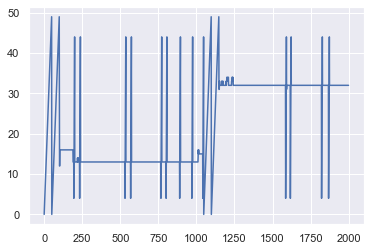

3.7188823129251696
collection rounds: 265
IDST_1


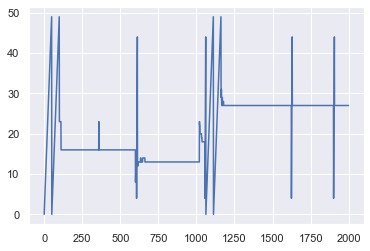

3.6280163265306125
collection rounds: 220
UCB1


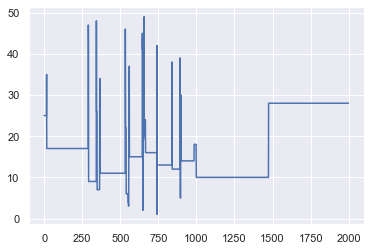

3.7248714285714284
UCBPI


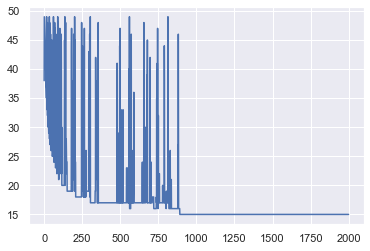

2.503446258503401
TS


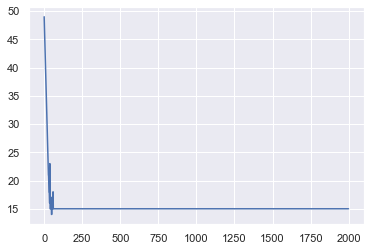

2.503446258503401
EG


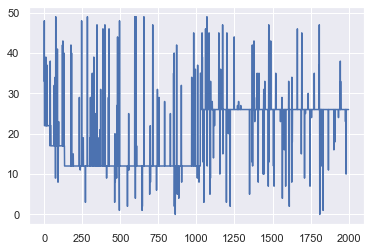

2.503446258503401


In [19]:
sns.set(font_scale=1)
print('IDS_1')
plt.plot(IDS_1_arm)
plt.show()
print(IDS_1_re[-300:].mean())
print('collection rounds:', IDS_1.collection_rounds)

print('IDST_1')
plt.plot(IDST_1_arm)
plt.show()
print(IDST_1_re[-300:].mean())
print('collection rounds:', IDST_1.collection_rounds)

print('UCB1')
plt.plot(UCB1_arm)
plt.show()
print(UCB1_re[-300:].mean())

print('UCBPI')
plt.plot(UCBPI_arm)
plt.show()
print(UCBPI_re[-300:].mean())

print('TS')
plt.plot(TS_arm)
plt.show()
print(UCBPI_re[-300:].mean())

print('EG')
plt.plot(EG_arm)
plt.show()
print(UCBPI_re[-300:].mean())

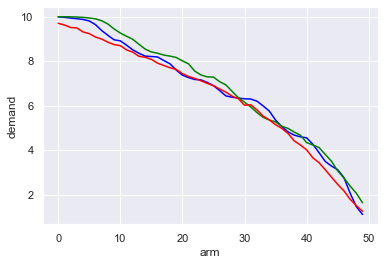

In [9]:
#Est
sns.lineplot(data=IDS_1.get_p_a_y() @ np.linspace(1, 10, 11), color='blue')
sns.lineplot(data=IDST_1.get_p_a_y() @ np.linspace(1, 10, 11), color='green')
#True
df2['demand'] = df2['reward'] / df2['price']
sns.lineplot(data=df2.groupby('arm').demand.mean(), color='red')
plt.show()

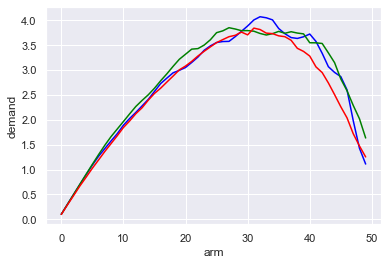

In [10]:
#Est
sns.lineplot(data=IDS_1.get_p_a_y() @ np.linspace(1, 10, 11) * price_list, color='blue')
sns.lineplot(data=IDST_1.get_p_a_y() @ np.linspace(1, 10, 11) * price_list, color='green')
#True
df2['demand'] = df2['reward'] / df2['price']
sns.lineplot(data=df2.groupby('arm').demand.mean() * price_list, color='red')
plt.show()